In [1]:
# Create generative models for each of the sites

import sys

sys.path.append('/home/anton/Documents/Tulane/Research/demo-vae/pip/src/')

from demovae import DemoVAE

In [2]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [3]:
import pickle
import numpy as np

loc = 'Hartford'
diag_map = {'SZP': 0, 'BPP': 1, 'SADBPP': 2, 'SADDEPP': 2, 'NC': 3, 'SADDEPR': 3, 'SADBPR': 3, 'BPR': 3, 'SZR': 3} 

# Age sex race diagnosis
demo_types = ['continuous', 'categorical', 'categorical', 'categorical']
demo = [[], [], [], []]
fc = []

bsnipdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/BSNIP/'
bsnip = pickle.load(open(f'{bsnipdir}/demographics.pkl', 'rb'))

a,b = np.triu_indices(264,1)

for sub in bsnip['Age_cal']:
    parts = sub.split('.')
    if parts[0] != loc:
        continue
    age = bsnip['Age_cal'][sub]
    sex = int(bsnip['sex'][sub] == 's1.0')
    race = int(bsnip['Race'][sub] == 'AA')
    diag = bsnip['DXGROUP_1'][sub]
    if diag_map[diag] not in [0,3]:
        continue
    demo[0].append(age)
    demo[1].append(sex)
    demo[2].append(race)
    demo[3].append(diag_map[diag])
    p = np.load(f'{bsnipdir}/fc/{sub}_task-unk_fc.npy')
    p = remap(vec2mat(p))[a,b]
    fc.append(p)

fc = np.stack(fc)
for i in range(len(demo)):
    demo[i] = np.array(demo[i])
    print(demo[i])

print(fc.shape)

[19. 56. 21. 43. 29. 32. 45. 18. 37. 42. 50. 27. 48. 45. 38. 49. 19. 18.
 59. 22. 46. 26. 20. 52. 56. 44. 64. 22. 63. 22. 25. 22. 44. 48. 20. 57.
 33. 46. 30. 50. 61. 57. 60. 61. 28. 23. 32. 39. 35. 26. 61. 58. 52. 26.
 16. 26. 27. 50. 16. 45. 27. 16. 47. 21. 51. 58. 26. 46. 25. 55. 26. 18.
 56. 58. 61. 22. 27. 16. 29. 42. 26. 17. 25. 58. 62. 48. 44. 23. 54. 63.
 49. 39. 50. 17. 38. 28. 33. 41. 51. 54. 53. 51. 23. 24. 54. 27. 26. 40.
 21. 16. 32. 56. 56. 24. 18. 21. 26. 45. 25. 64. 37. 53. 30. 44. 17. 62.
 44. 42. 23. 64. 24. 65. 29. 21. 59. 19. 57. 54. 53. 27. 59. 30. 49. 21.
 51. 24. 15. 21. 25. 32. 57. 63. 28. 22. 24. 22. 39. 28. 27. 57. 48. 64.
 22. 28. 45. 24. 54. 22. 26. 58. 54. 47. 54. 17. 58. 44. 26. 27. 61. 17.
 60. 57. 24. 60. 24. 27. 49. 63. 45. 62. 32. 23. 26. 58. 62. 43. 49. 61.
 28. 34. 54. 24. 24. 38. 17. 32. 38. 55. 52. 39. 65. 33. 25. 18. 21. 25.
 29. 43. 58. 26. 31. 47. 18. 37. 48. 54. 20. 25. 60. 24. 26. 32. 23. 61.
 26. 41. 46. 21. 27. 19. 27. 57. 41. 17. 57. 56. 17

In [4]:
mydemo = [demo[1], demo[2], demo[3]]
mydemo_types = [demo_types[1], demo_types[2], demo_types[3]]

vae = DemoVAE(pperiod=100, use_cuda=True, nepochs=3000, latent_dim=30, weight_decay=0, lr=5e-5, loss_rec_mult=100, loss_pred_mult=.01)
vae.fit(fc, mydemo, mydemo_types)

Fitting auxilliary guidance model for demographic 0 categorical... done
 doneng auxilliary guidance model for demographic 1 categorical...
Fitting auxilliary guidance model for demographic 2 categorical... done
Converting input to pytorch
Converting demographics to pytorch
Beginning VAE training
Epoch 0 ReconLoss 0.293 CovarianceLoss 49.8411 MeanLoss 0.0483 DecorLoss 6.9535 GuidanceTargets [1, 0, 1, 0, 0, 1] GuidanceLosses ['4.0708', '4.0708', '0.2437', '0.2437', '0.2086', '0.2086'] 
Epoch 100 ReconLoss 0.1745 CovarianceLoss 48.9023 MeanLoss 0.2312 DecorLoss 0.158 GuidanceTargets [1, 0, 1, 0, 1, 0] GuidanceLosses ['0.0042', '0.0042', '0.5813', '0.5813', '0.2682', '0.2682'] 
Epoch 200 ReconLoss 0.1602 CovarianceLoss 48.2475 MeanLoss 0.1868 DecorLoss 0.0284 GuidanceTargets [0, 1, 0, 1, 1, 0] GuidanceLosses ['0.0', '0.0', '0.0015', '0.0015', '0.0004', '0.0004'] 
Epoch 300 ReconLoss 0.1567 CovarianceLoss 48.2074 MeanLoss 0.1857 DecorLoss 0.0352 GuidanceTargets [1, 0, 1, 0, 0, 1] GuidanceLo

DemoVAE(LR_C=100, alpha=100, bsize=1000, latent_dim=30, loss_C_mult=1,
        loss_decor_mult=10, loss_mu_mult=1, loss_pred_mult=0.01,
        loss_rec_mult=100, lr=5e-05, nepochs=3000, pperiod=100, use_cuda=True,
        weight_decay=0)

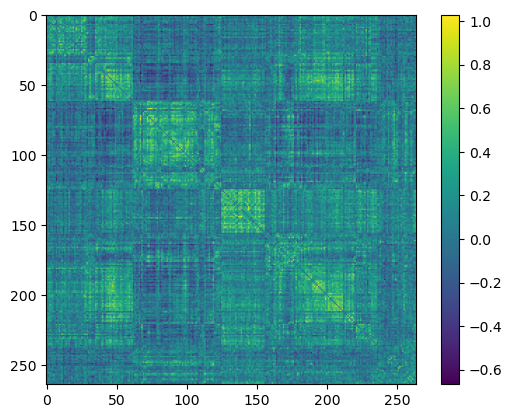

In [7]:
import matplotlib.pyplot as plt

xx = vae.transform(len(fc), mydemo, mydemo_types)

plt.imshow(vec2mat(xx[51]))
plt.colorbar()

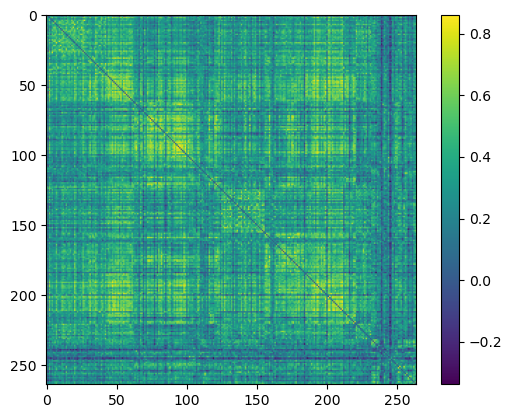

In [118]:
plt.imshow(vec2mat(fc[51]))
plt.colorbar()

In [48]:
path = f'/home/anton/Documents/Tulane/Research/FederatedVAE/BSNIP_Models/SexRaceDiag/{loc}.pkl'

vae.save(path)